In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [3]:
## Funciona, porém está usando dict ##

def compZh(x, dx, dt=1):
    zh = {}
    for val in x:
        val_int = int(val / dx) * dx
        zh[val_int] = zh.get(val_int, 0) + 1
    
    for val in zh:
        zh[val] = float(zh[val]) / dt / dx
    
    return zh

def state(x, x0, x1, dx):
    zheq = compZh(x, dx)
    zhtp = {}
    
    def addZh(zh, ltpx):
        for val in ltpx:
            val_int = int(val / dx) * dx
            # print(val_int)
            zh[val_int] = zh.get(val_int, 0) + 1
            print(zh)
    
    s = 2  # estado inicial
    ltpx = []
    if x0 > x1:
        x0, x1 = x1, x0  # garante que x0 sempre seja menor que x1
    
    for val in x:
        ltpx.append(val)
        
        if s == 2:
            if val <= x0:
                s = 0
            if val >= x1:
                s = 1    # garante a troca de estados
        
        if val <= x0:
            if s == 1:
                addZh(zhtp, ltpx)
            s = 0
            ltpx = []
        
        if val >= x1:
            if s == 0:
                addZh(zhtp, ltpx)
            s = 1
            ltpx = []
    
    ptpx = []
    for val in zheq:
        ptpx.append((val, float(zhtp.get(val, 0)) / dx / zheq[val]))
    ptpx.sort()
    
    return zheq

x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)


# Para testar a função
x0 = 30
x1 = 37
dx = 0.5 # ideal 0.1 a 0.5 
result = state(x, x0, x1, dx)
hist = compZh(x, dx, dt=1)
# print(result)

# result_str = '\n'.join([f"{val:.2f}, {prob:.4f}" for val, prob in result]) # transforma dict em str

# with open('TPX_fep1d.txt', 'w') as arquivo:
#     arquivo.write(result_str)

{36.5: 1}
{36.5: 1, 36.0: 1}
{36.5: 1, 36.0: 1, 34.5: 1}
{36.5: 1, 36.0: 1, 34.5: 1, 29.5: 1}
{36.5: 1, 36.0: 1, 34.5: 1, 29.5: 1, 31.5: 1}
{36.5: 1, 36.0: 1, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 1}
{36.5: 1, 36.0: 1, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2}
{36.5: 2, 36.0: 1, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2}
{36.5: 2, 36.0: 1, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 1}
{36.5: 2, 36.0: 1, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 1, 38.5: 1}
{36.5: 2, 36.0: 2, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 1, 38.5: 1}
{36.5: 2, 36.0: 2, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 1, 38.5: 1, 32.0: 1}
{36.5: 2, 36.0: 2, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 1, 38.5: 1, 32.0: 1, 28.5: 1}
{36.5: 2, 36.0: 2, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 1, 38.5: 1, 32.0: 1, 28.5: 1, 32.5: 1}
{36.5: 2, 36.0: 2, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 2, 35.5: 2, 38.5: 1, 32.0: 1, 28.5: 1, 32.5: 1}
{36.5: 2, 36.0: 2, 34.5: 1, 29.5: 1, 31.5: 1, 34.0: 3, 35.5: 2, 38.5: 1, 32.0: 1, 28.5: 1, 32.5: 1}
{36.5: 2, 36

In [15]:
X = []
Y = []

for l, i in hist.items():
    X.append(l)
    Y.append(i)
    
X = np.asarray(X)
Y = np.asarray(Y)

# total =  np.stack((X, Y), axis=-1)
# np.savetxt("hist_fep1d", total, fmt="%5.4f")

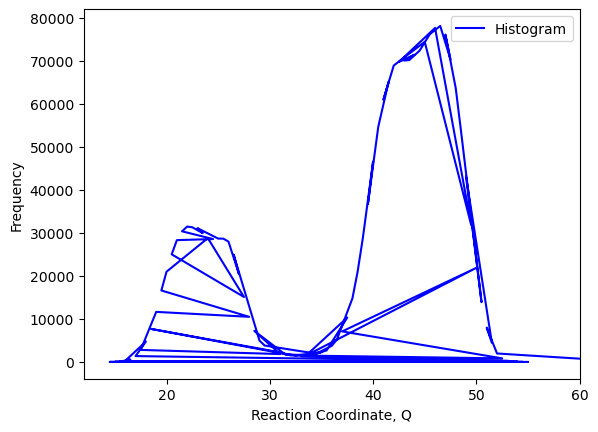

In [16]:
x = X 
fig, ax = plt.subplots()
ax.plot(x, Y, color='blue', label = 'Histogram')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('Frequency')
plt.xlim([None, 60])
plt.ylim([None, None])
plt.legend()
plt.show()

In [17]:
x, y = zip(*result) 
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label = 'p(TP|X)')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('p(TP|X)')
plt.xlim([None, 60])
plt.ylim([None, None])
plt.legend()
plt.show()

TypeError: 'float' object is not iterable